# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?


Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

### Observables of Interest

We are particularly interested in the following observables:

- Internal energy per particle: $\frac{E}{N} [\epsilon]$
- Kinetic energy per particle: $\frac{K}{N} [\epsilon] $
- Potential energy per particle: $\frac{U}{N} [\epsilon]$
- Temperature: $T [\frac{k_B}{\epsilon}]$ 
- Pressure: $P [\frac{\sigma^3}{\epsilon}]$

### Microcanonical Ensemble

The microcanonical ensemble is a statistical ensemble that describes isolated systems, i.e., systems with a defined value of energy , volume, and number of particles. It is based on two postulates. Consider a fluid consisting of \( N \) particles contained in a box of volume \( V \).

1. **Postulate 1** - "postulate of equal a priori probability": The microstates characterized by the same energy \( E \) are equally probable (known as the .
2. **Postulate 2** - "Ergodic hypothesis":The ensemble averages at equilibrium do not depend on time

### Molecular Dynamics (MD)

Molecular dynamics (MD) is a numerical simulation method that allows the analysis of the movement of atoms and molecules. To evolve the positions and velocities of atoms, it is first necessary to provide information about the interaction potential. For the simulation in this exercise (and also in Exercise 7), we will work with the Lennard-Jones potential:

$$ V(r) = 4 \mathcal{E} \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right] $$

where \( $\mathcal{E}$ \) is the depth of the potential well, and \( \sigma \) is the distance at which the potential changes sign. From the potential, it is possible to derive the forces acting on individual particles and consequently the various accelerations. Knowing the accelerations \( $a_i$ \), the future positions can then be derived. Since we are interested in sampling configurations where energies are conserved, it's important that the particle trajectories must stay on the appropriate constant-energy hyper-surface in phase space, otherwise correct ensemble averages will not
be generated.

#### Verlet Algorithm

The Verlet algorithm is a finite difference method that uses two third-order Taylor expansions, one at \( $+\delta t$ \) and the other at \( $-\delta t$ \). We have:

$$ \vec{r}(t + \delta t) = \vec{r}(t) + \delta t \vec{v}(t) + \frac{1}{2} \delta t^2 \vec{a}(t) + \frac{1}{3!} \delta t^3 \dot{\vec{a}}(t) + \mathcal{O}(\delta t^4) $$
$$ \vec{r}(t - \delta t) = \vec{r}(t) - \delta t \vec{v}(t) + \frac{1}{2} \delta t^2 \vec{a}(t) - \frac{1}{3!} \delta t^3 \dot{\vec{a}}(t) + \mathcal{O}(\delta t^4) $$

Adding these two equations, we get:

$$ \vec{r}(t + \delta t) \approx 2 \vec{r}(t) - \vec{r}(t - \delta t) + \delta t^2 \vec{a}(t) $$

Thus, the position at the next time step depends on both the current position and the position at the previous time step. To perform a step, it is always necessary to have two configurations in memory. Throughout the execution of the code, the velocities of the individual molecules are also tracked in order to calculate Kinetical Energy:

$$ \vec{v}(t) \simeq \frac{\vec{r}(t + \delta t) - \vec{r}(t - \delta t)}{2 \delta t} $$

but since we calculate the potential energies with the updated position at $t+\delta t$ it's reasonable to also calculate the velocities at $t+\delta t$, this can be done by deriving with respect to t the first taylor expansion above, the result reads:

$$ \vec{v}(t + \delta t) = \vec{v}(t) + \delta t \vec{a}(t) + \mathcal{O}(\delta t^2) = \frac{\vec{r}(t + \delta t) - \vec{r}(t - \delta t)}{2 \delta t} + \delta t \vec{a}(t) + \mathcal{O}(\delta t^2)$$

this correction can be easily computed since we already calculate $\vec{a}(t)$ in order to obtain the positions at $t+\delta t$

#### Periodic Boundary Condition

To study the bulk properties of a system, it is not possible to work with a single box containing a certain number of molecules, as the interactions with the walls would be too impactful. To achieve our goal, the analyzed box is replicated in space to create an infinite lattice. Each time a molecule moves in the original box, its periodic image in the various replicas of the box makes the same move. The "particle density" in the central box is therefore conserved because when a molecule exits from one side, its image enters from the opposite side. The advantage of this approach is that it is not necessary to store the coordinates of all the molecules, but only those of the central box. Additionally, if the potential is short-range (like Lennard-Jones), the symmetry of the lattice is not evident.

#### Potential Energy

The core of the simulation is calculating the potential energy of a given configuration. It is clearly not feasible to consider all images of particles in the replicas of the starting box. To evaluate the interaction of molecule 1 with others, a spherical cut-off of the potential is performed: only particles whose distance from molecule 1 is less than \( $r_{\text{cut}}$ \) are considered as interacting. This method is clearly imprecise, as it does not account for all possible interactions. However, tail corrections can be applied to ensure the numerical results are accurate.


## Termalization

 A problem arises during the initial setup: while we can choose a crystalline configuration for positions, what about the velocities? The easiest solution is to generate them randomly according to the Maxwell-Boltzmann distribution. This occurs when the input parameter `restart` is set to `0`: the program loads the crystalline configuration saved in `INPUT/CONFIG/config.xyz` and extracts velocities following the Maxwell-Boltzmann distribution (while also correcting an undesired drift effect).

However, even this initialization doesn't guarantee a perfect equilibrium in the system: the temperature doesn't remain constant at the desired value but tends to drift towards another value, around which it stabilizes.

This might be due to the fact that, although the code extracts velocities according to a Maxwellian distribution, subsequent collisions redistribute kinetic energy differently. Indeed, by definition, in the microcanonical ensemble, total energies is conserved but not the kinetical or potential energies, so the temperature isn't fixed.

We can simulate at a desired temperature by adjusting the initial temperature so that the stabilization value matches the desired one and after this phase of termalization we can start measuring the quantities of interest.

To operate under the required thermodynamic conditions (see the beginning of the report), I executed the code multiple times to understand the necessary input temperatures, enabling me to work within the desired context. In particular, I found that i should start with these temperatures:

$$ \begin{cases}
  T_{gas} = 0.941 \\
  T_{liquid} = 2.0838  \\
  T_{solid} = 1.596
\end{cases}$$

I monitored the instantaneous temperature values for each step (using $N= 4\cdot 10^4$ blocks of 1 MD step for the solid and liquid phases and $N=4\cdot 10^5$ for gaseous phase, we observe that the latter is slower to reach equilibrium due to the rarer interactions between particles).

Below are the istantaneous (every $\delta t$) measurement of temperature, for Solid and Liquid simulations the system stabilizes quickly and with smaller fluctuation than the Gas phase, due to the low density, interactions are rarer compared to the other 2 cases and so velocities doesn't change much from one time step to another, in fact from the plot below we can see that Gas' temperature are more correlated (for extended period of time it stays above or below the average).

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.optimize import curve_fit

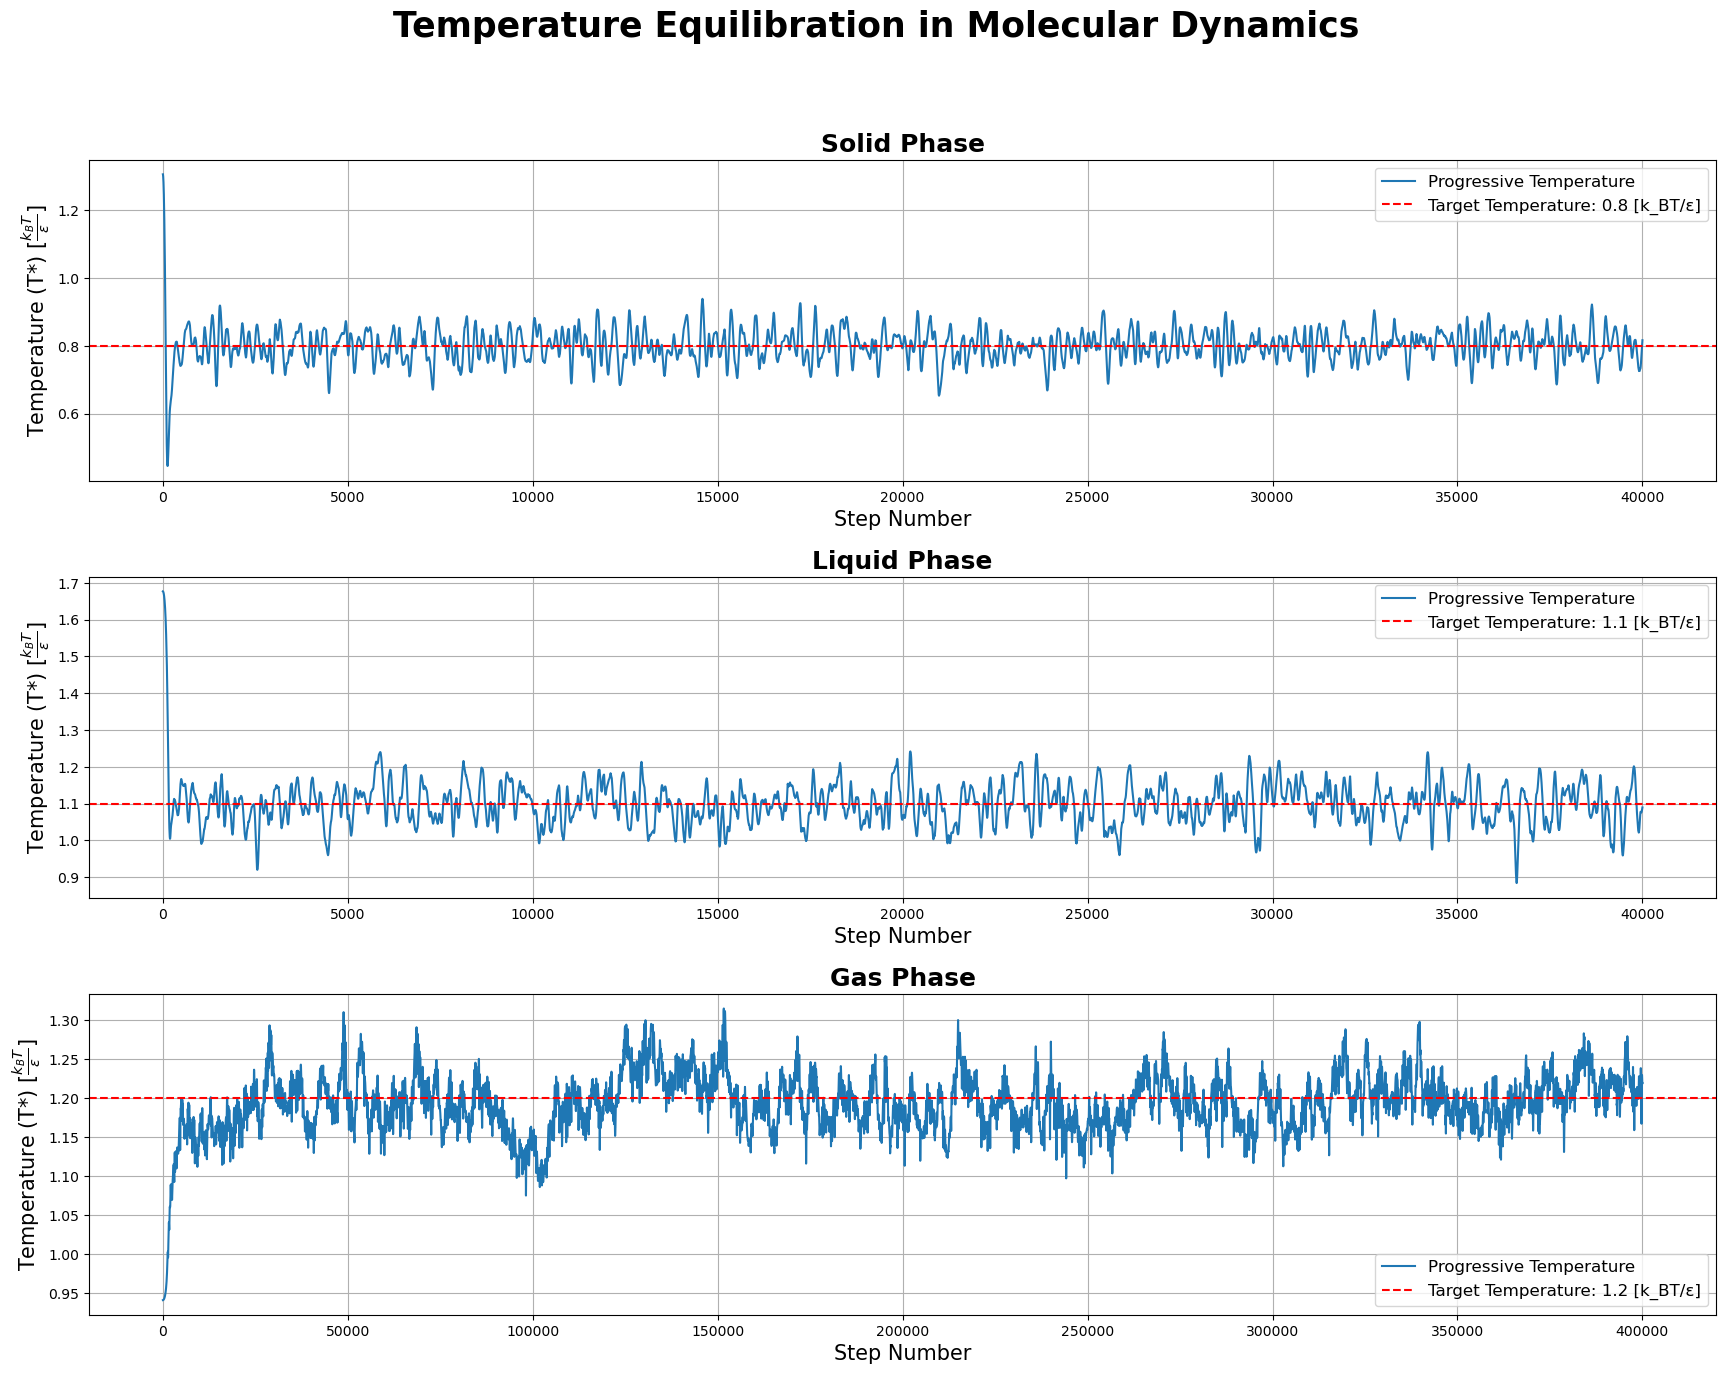

In [20]:
# Parameters
npart = 108  # Number of particles, though it is not used in the code
N = [40000, 40000, 400000]  # Number of steps for each phase
phases = ["Solid", "Liquid", "Gas"]  # Different phases
titles = ["Solid Phase", "Liquid Phase", "Gas Phase"]  # Titles for each subplot
Teq = [0.8, 1.1, 1.2]  # Target equilibrium temperatures for each phase

# Create a figure with specified size
plt.figure(figsize=(21, 15))
plt.suptitle("Temperature Equilibration in Molecular Dynamics", fontsize=25,fontweight='bold')

# Loop over each phase
for i in range(3):
    # Create a subplot for each phase
    plt.subplot(3, 1, i + 1)
    
    # Generate x values as step numbers
    x = np.arange(N[i]) + 1
    
    # Load temperature data from file
    aveT = np.loadtxt(f"../DATA/{phases[i]}/Termal/temperature.dat", usecols=(1), skiprows=1, unpack=True)
    
    # Plot the temperature data
    plt.plot(x, aveT, marker=None, label="Progressive Temperature", linewidth=1.5)
    
    # Set title for each subplot
    plt.title(titles[i], fontsize=18,fontweight='bold')
    
    # Set labels for x and y axes with units
    plt.ylabel(r'Temperature (T*) [$\frac{k_B T} {\epsilon}$]', fontsize=15)
    plt.xlabel('Step Number', fontsize=15)
    
    # Draw a horizontal line for target temperature
    plt.axhline(y=Teq[i], color="r", linestyle='--', label=f"Target Temperature: {Teq[i]} [k_BT/ε]")
    
    # Add grid for better readability
    plt.grid(True)
    
    # Add legend to the plot
    plt.legend(fontsize=12)
    
    # Adjust layout spacing between subplots
    plt.subplots_adjust(hspace=0.3)

# Display the plot
plt.show()

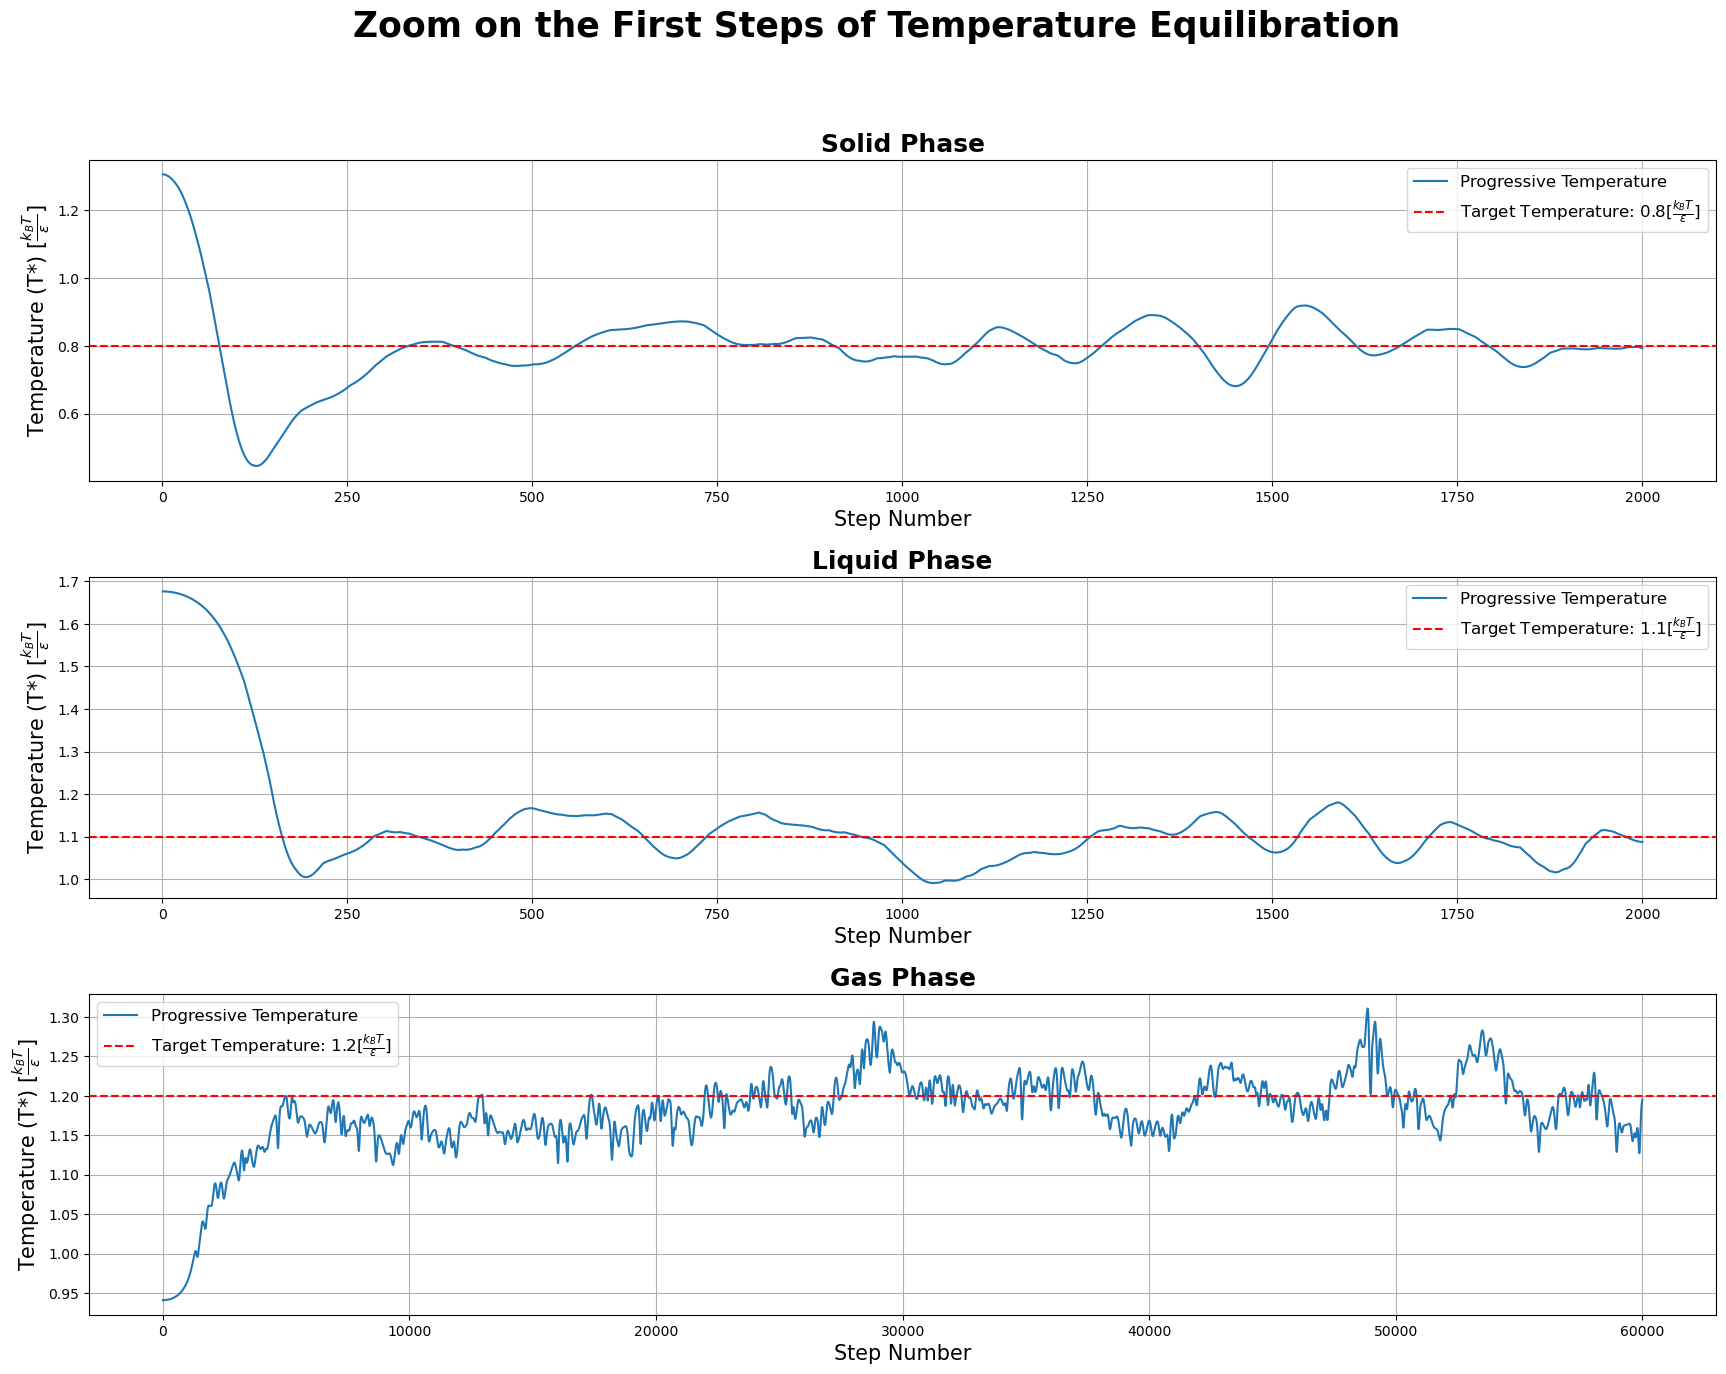

In [22]:
# Parameters for zoomed-in plots
npart = 108  # Number of particles, though it is not used in the code
N_zoom = [2000, 2000, 60000]  # Number of steps to zoom in for each phase
phases = ["Solid", "Liquid", "Gas"]  # Different phases
titles = ["Solid Phase", "Liquid Phase", "Gas Phase"]  # Titles for each subplot
Teq = [0.8, 1.1, 1.2]  # Target equilibrium temperatures for each phase

# Create a figure with specified size for zoomed-in plots
plt.figure(figsize=(21, 15))
plt.suptitle("Zoom on the First Steps of Temperature Equilibration", fontsize=25,fontweight='bold')

# Loop over each phase
for i in range(3):
    # Create a subplot for each phase
    plt.subplot(3, 1, i + 1)
    
    # Generate x values as step numbers
    x = np.arange(N_zoom[i]) + 1
    
    # Load temperature data from file
    aveT = np.loadtxt(f"../DATA/{phases[i]}/Termal/temperature.dat", usecols=(1), skiprows=1, unpack=True)
    
    # Plot the temperature data for the first N_zoom steps
    plt.plot(x, aveT[:N_zoom[i]], marker=None, label="Progressive Temperature", linewidth=1.5)
    
    # Set title for each subplot
    plt.title(titles[i], fontsize=18,fontweight='bold')
    
    # Set labels for x and y axes with units
    plt.ylabel(r'Temperature (T*) [$\frac{{k_B T}} {{\epsilon}}$]', fontsize=15)
    plt.xlabel('Step Number', fontsize=15)
    
    # Draw a horizontal line for target temperature
    plt.axhline(y=Teq[i], color="r", linestyle='--', label=f"Target Temperature: {Teq[i]}"+ r"[$\frac{{k_B T}}{{\epsilon}}$]")
    
    # Add grid for better readability
    plt.grid(True)
    
    # Add legend to the plot
    plt.legend(fontsize=12)
    
    # Adjust layout spacing between subplots
    plt.subplots_adjust(hspace=0.3)

# Display the plot
plt.show()


By monitoring the temperature, it's observed that in the initial stages of the simulation, there is a sharp decrease for the cases of the liquid and solid phases, whereas in the gaseous phase, the opposite behavior is observed (an increase).

The explanation for this phenomenon is that we are working with the total energy of the system $E_{tot}$ fixed: an increase in the potential energy results in a decrease in kinetic energy. Given the close relationship between kinetic energy and temperature $K = \frac{3}{2}N k_B T$, a decrease in the former directly affects the latter. 

Since we start from a solid configuration, where potential energy should be lower with respect to other configurations, so it's normal for expect temperature to start falling (kinetical energy decreases). But in the gas phase i observe an unexpected increase. This is due to fact that in the config.fcc, the x,y,z are in units of the side length. For the Gas phase that have a huge box, the molecules are faraway from each other, then they will tend to the minimum of the Lennard Jones potential, decreasing potential energy and increasing kinetical energy, this explains why we see a rise in temperature.


Furthermore, from these graphs we can deduce that that termalization ends roughly after $N_\alpha$ steps where:

$$ N_\alpha = 
\begin{cases}
    400 \quad \text{$\alpha$ = solid} \\
    400 \quad \text{$\alpha$ = liquid} \\
    15000 \quad \text{$\alpha$ = gas}
\end{cases}$$

for the measurements in the next sections i skip $N_\alpha$ steps.

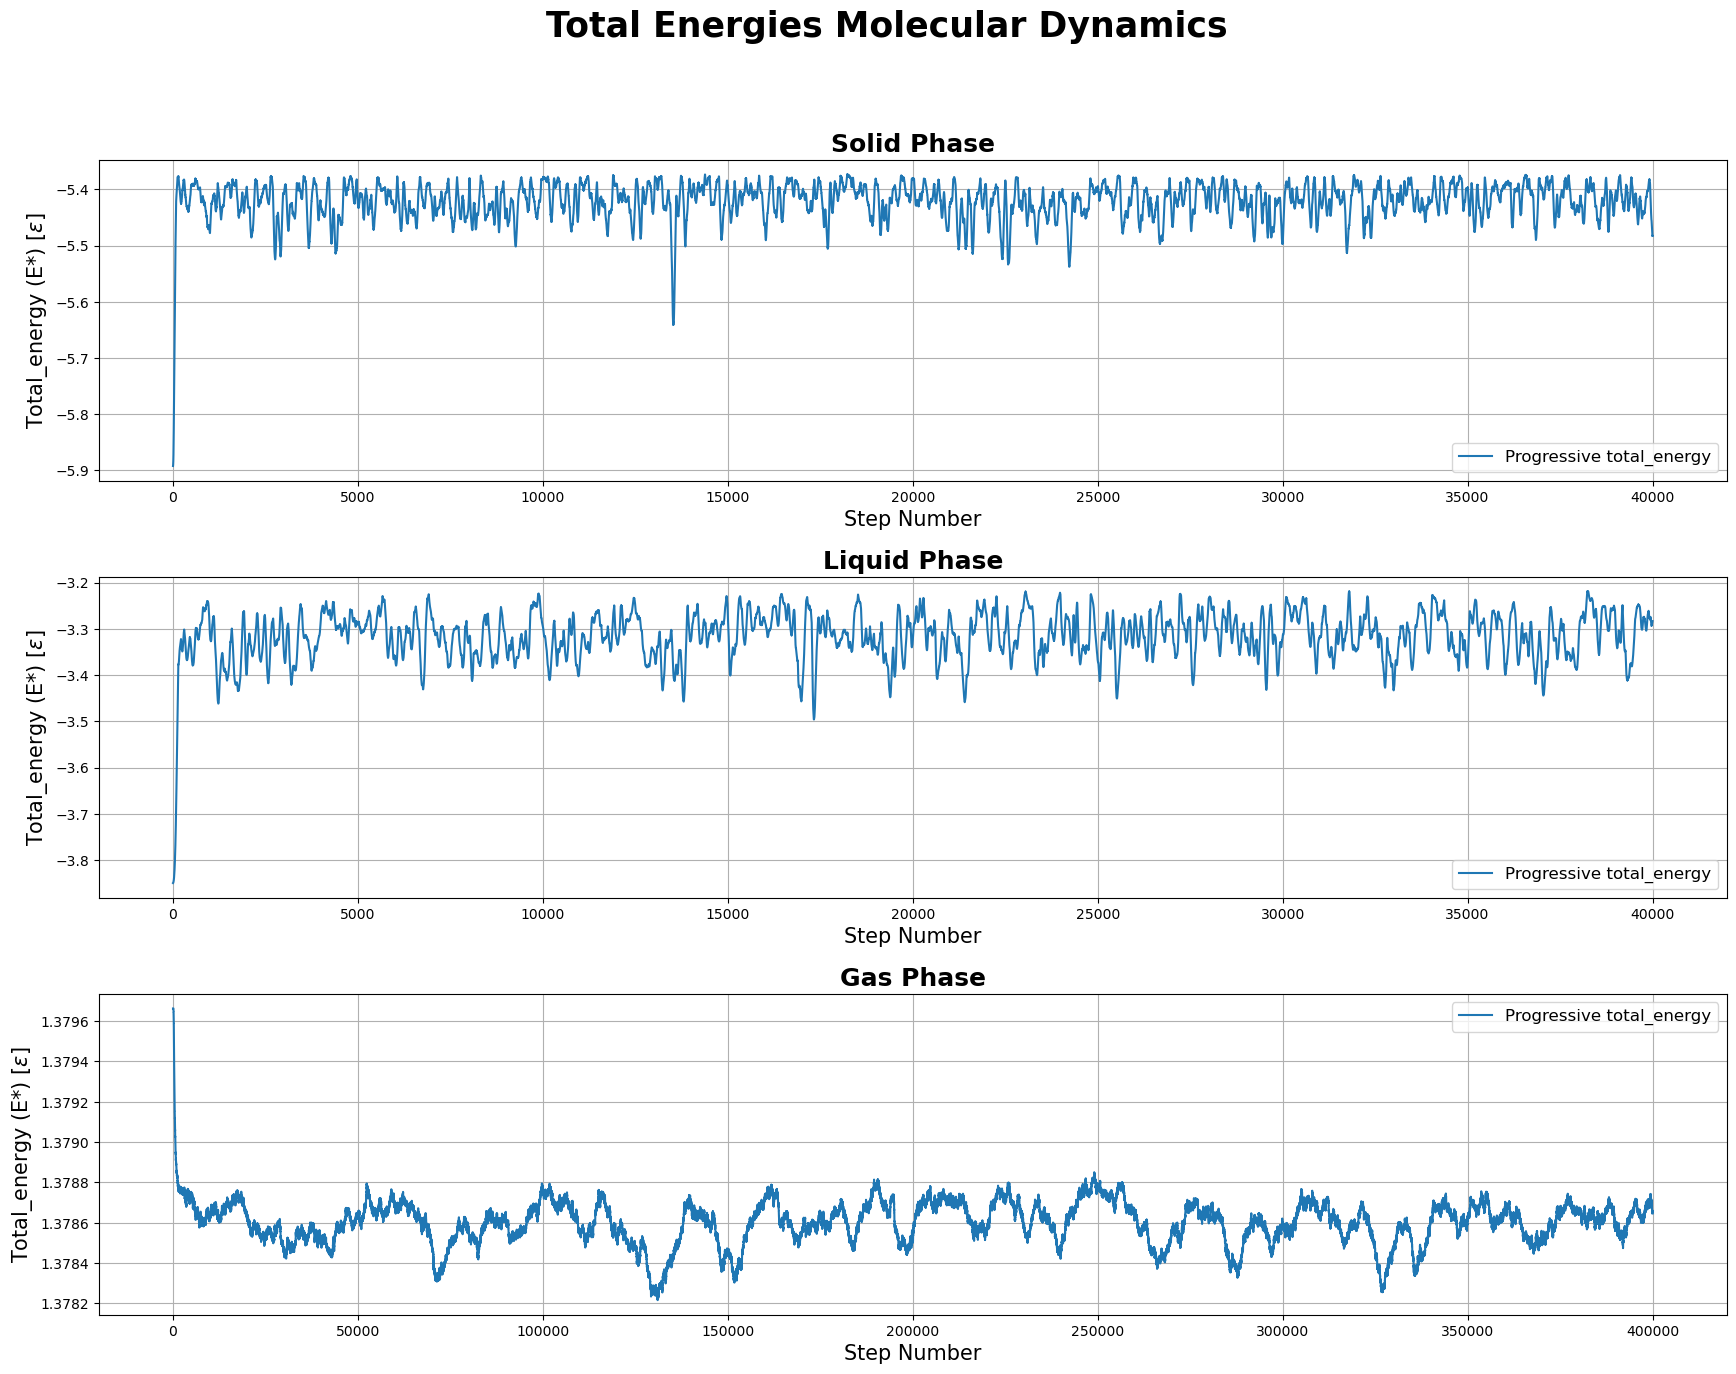

In [5]:
# Parameters
npart = 108  # Number of particles, though it is not used in the code
N = [40000, 40000, 400000]  # Number of steps for each phase
phases = ["Solid", "Liquid", "Gas"]  # Different phases
titles = ["Solid Phase", "Liquid Phase", "Gas Phase"]  # Titles for each subplot
Teq = [0.8, 1.1, 1.2]  # Target equilibrium total_energys for each phase

# Create a figure with specified size
plt.figure(figsize=(21, 15))
plt.suptitle("Total Energies Molecular Dynamics", fontsize=25,fontweight='bold')

# Loop over each phase
for i in range(3):
    # Create a subplot for each phase
    plt.subplot(3, 1, i + 1)
    
    # Generate x values as step numbers
    x = np.arange(N[i]) + 1
    
    # Load total_energy data from file
    aveT = np.loadtxt(f"../DATA/{phases[i]}/Termal/total_energy.dat", usecols=(1), skiprows=1, unpack=True)
    
    # Plot the total_energy data
    plt.plot(x, aveT, marker=None, label="Progressive total_energy", linewidth=1.5)
    
    # Set title for each subplot
    plt.title(titles[i], fontsize=18,fontweight='bold')
    
    # Set labels for x and y axes with units
    plt.ylabel(r'Total_energy (E*) [$\epsilon$]', fontsize=15)
    plt.xlabel('Step Number', fontsize=15)
    
    # Add grid for better readability
    plt.grid(True)
    
    # Add legend to the plot
    plt.legend(fontsize=12)
    
    # Adjust layout spacing between subplots
    plt.subplots_adjust(hspace=0.3)

# Display the plot
plt.show()

Observe that after initial equilibration, the total_energy fluctuates and doesn't diverge, Verlet Algorithm is working.

## Graphs of Progressive Averages with Uncertainties

 Below are the graphs (in reduced units) showing the progressive averages with respective uncertainties as a function of the number of blocks for:

- Kinetic energy per particle $\frac{K^*}{N}$,
- Potential energy per particle $\frac{U^*}{N}$,
- Total internal energy per particle $\frac{E^*}{N}$,
- Pressure $P^*$,
- Temperature $T^*$

with each block consisting of 2000 steps to reduce the correlation between one measurement and the one after it.
For temperature,i also included the average for each block, allowing visual verification that the previously performed equilibration was preserved. For completeness i also plot the averages for each block of the other quantities and observe that they indeed fluctuate around an equilibrium value.

In [25]:
npart = 108

N = 50
x = np.arange(N)+1    # uso l'ordinamento da 1 a N

th_var = ["kinetic_energy", "potential_energy", "total_energy", "pressure", "temperature"]
labels = [  "Kinetic en.\n(progr. average)",
            "Potential en.\n(progr. average)",
            "Total en.\n(progr. average)",
            "Pressure\n(progr. average)", 
            "Temperature\n(block average)",
            "Temperature\n(progr. average)"]
labels2 = [  "Kinetic en.\n(block average)",
            "Potential en.\n(block average)",
            "Total en.\n(block average)",
            "Pressure\n(block average)"]
titles = [  "Kinetic energy",
            "Potential energy",
            "Total energy",
            "Pressure", 
            "Temperature",
            "Temperature"]
ylabels = ["K*/N", "U*/N", "E*/N", "p*", "T*", "T*"]
colors = ["red", "orange", "gold", "green", "blue", "purple"]


## Gaseos State

```bash
SIMULATION_TYPE        0
RESTART                0
TEMP                   0.941
NPART                  108
RHO                    0.05
R_CUT                  5.0
DELTA                  0.0005
NBLOCKS                50
NSTEPS                 2000

ENDINPUT
```

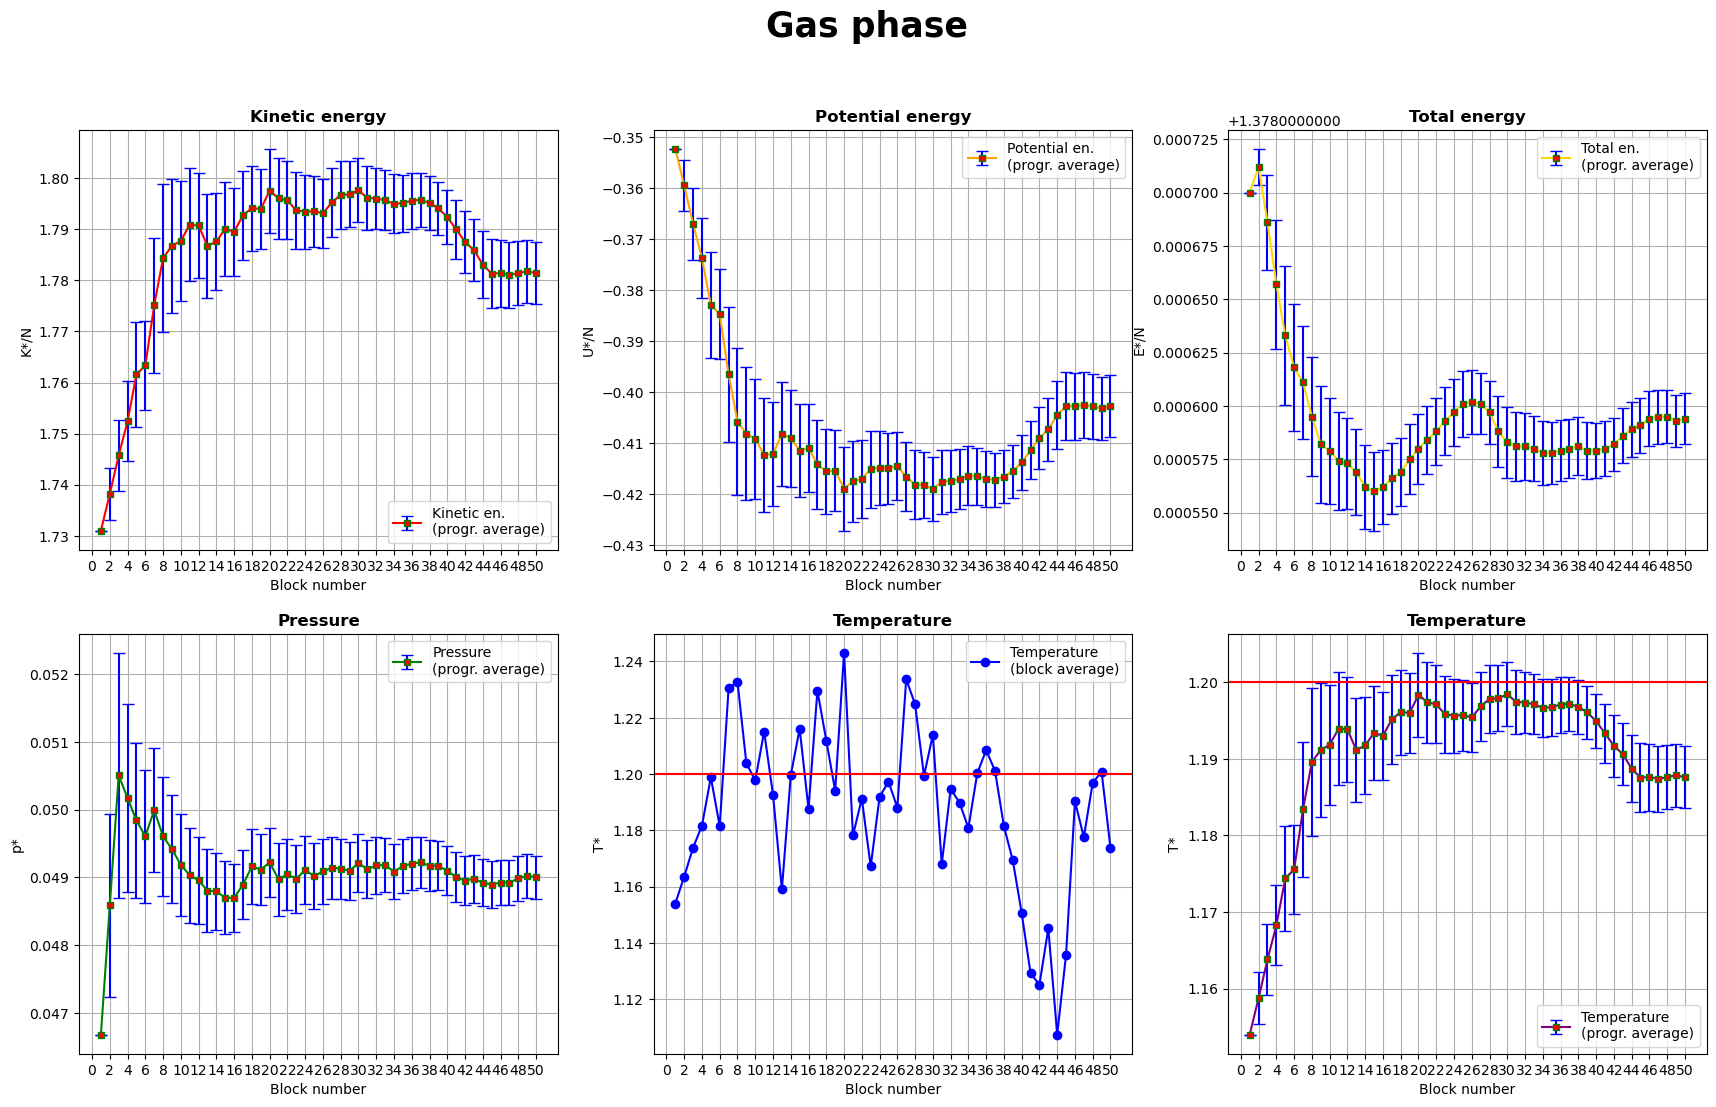

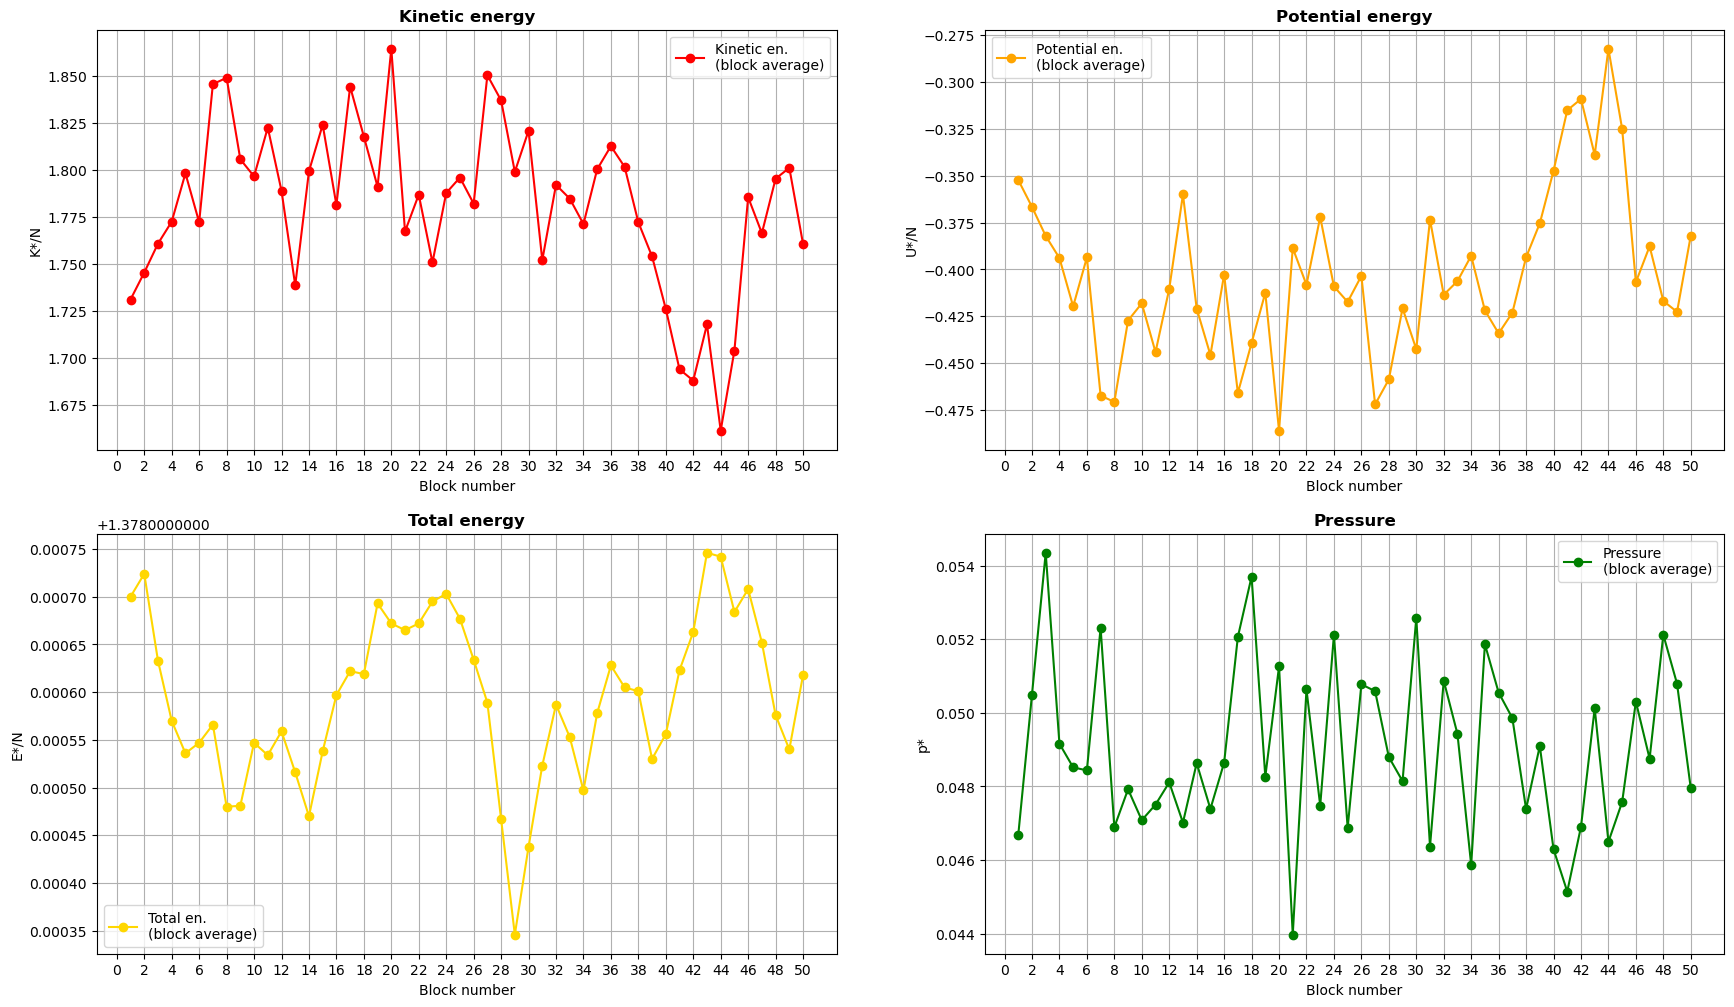

In [26]:
plt.figure(figsize=(21,12))
plt.suptitle("Gas phase", fontsize = 25,fontweight='bold')

for i in range(0,5):
    
    plt.subplot(2,3,i+1)
    ave, ave_prog, err = np.loadtxt("../DATA/Gas/"+th_var[i]+".dat", usecols=(1,2,3), unpack='true')

    if(i!=4):
        plt.errorbar(x, ave_prog, yerr = err, label=labels[i], color = colors[i],ecolor='blue', capsize=4,marker='s',mfc='red',mec='green', ms=5, mew=1)
    if(i==4):
        plt.plot(x, ave, marker='o', label=labels[i], color = colors[i])
        plt.axhline(y=1.2, color ="r") # desired equilibrium T*
    
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(0,N+1,2)) 
    plt.grid(True)
    plt.legend()

i=5
plt.subplot(2,3,i+1)
plt.errorbar(x, ave_prog, yerr = err, label=labels[i],color = colors[i],ecolor='blue', capsize=4,marker='s',mfc='red',mec='green', ms=5, mew=1)
plt.title(titles[i], fontweight='bold')
plt.ylabel(ylabels[i])
plt.xlabel('Block number')
plt.xticks(np.arange(0,N+1,2))
plt.axhline(y=1.2, color ="r") # desired equilibrium T*
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(21,12))

for i in range(0,4):
    
    plt.subplot(2,2,i+1)
    ave, ave_prog, err = np.loadtxt("../DATA/Gas/"+th_var[i]+".dat", usecols=(1,2,3), unpack='true')
    plt.plot(x, ave, marker='o', label=labels2[i], color = colors[i])
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(0,N+1,2)) 
    plt.grid(True)
    plt.legend()

plt.show()

## Liquid State

```bash
SIMULATION_TYPE        0
RESTART                0
TEMP                   2.0838
NPART                  108
RHO                    0.8
R_CUT                  2.5
DELTA                  0.0005
NBLOCKS                50
NSTEPS                 2000

ENDINPUT
```

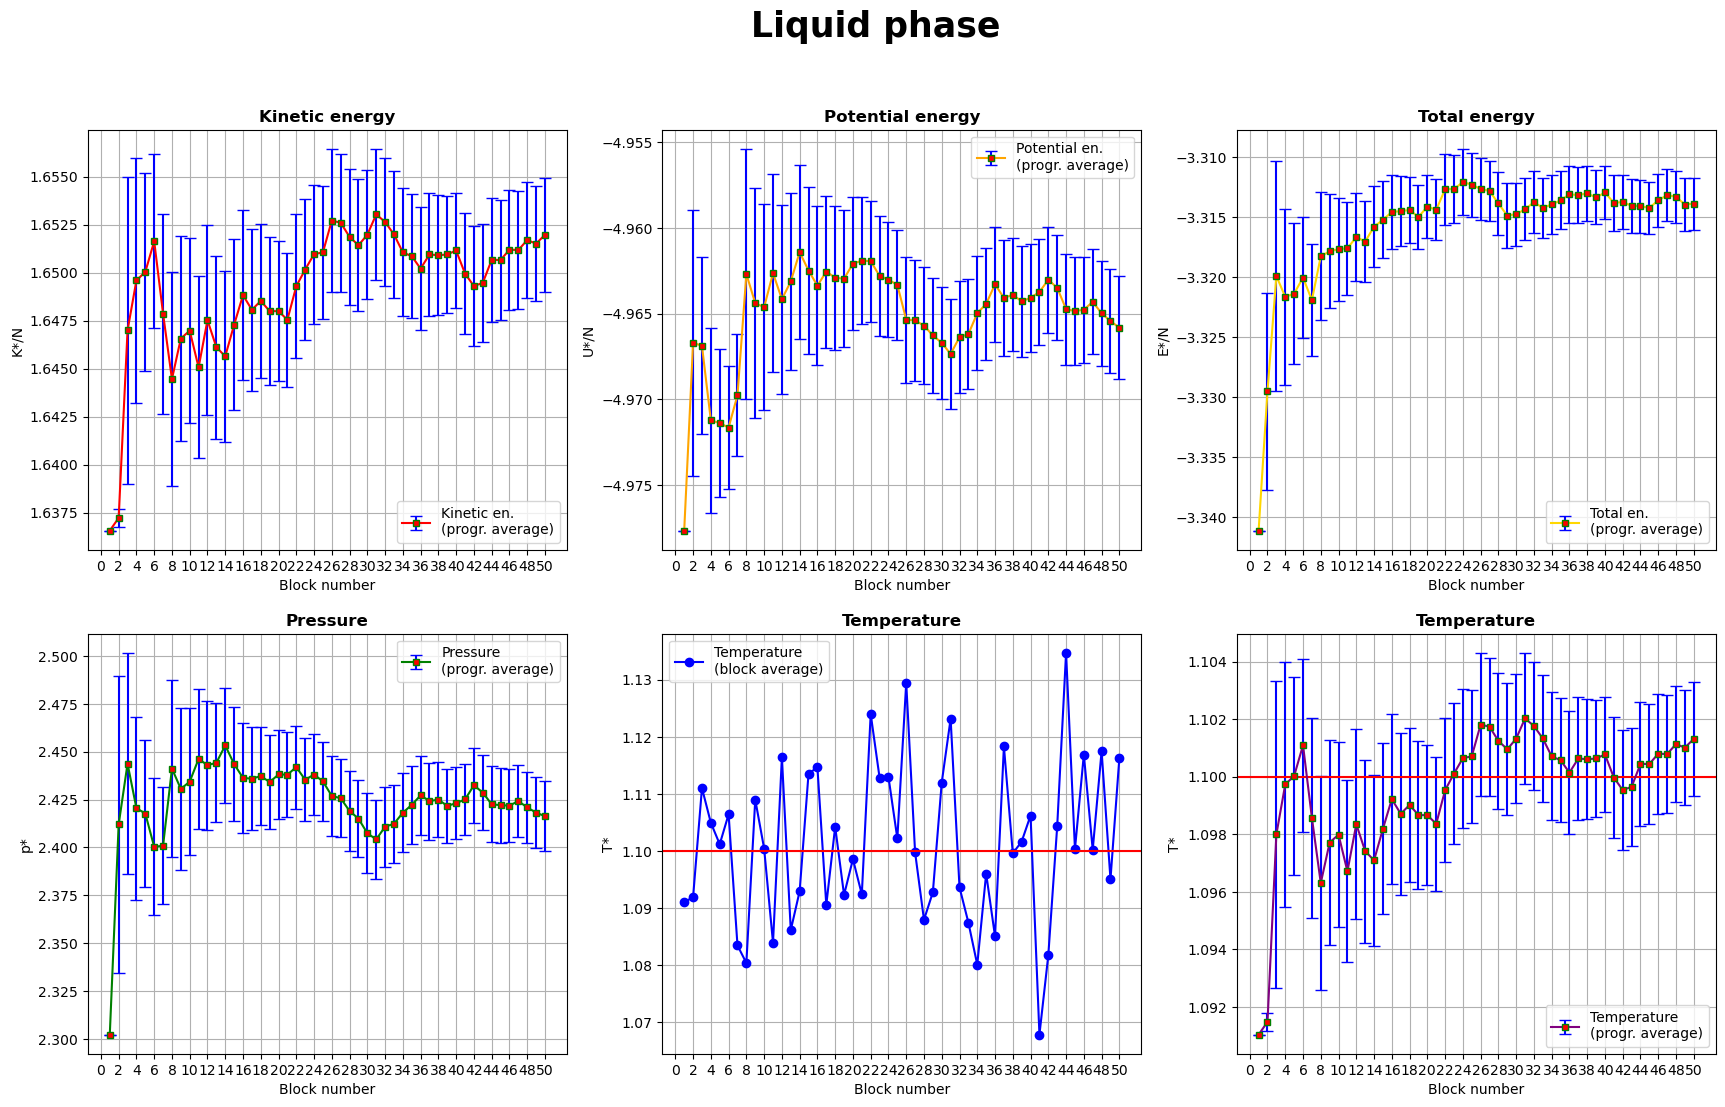

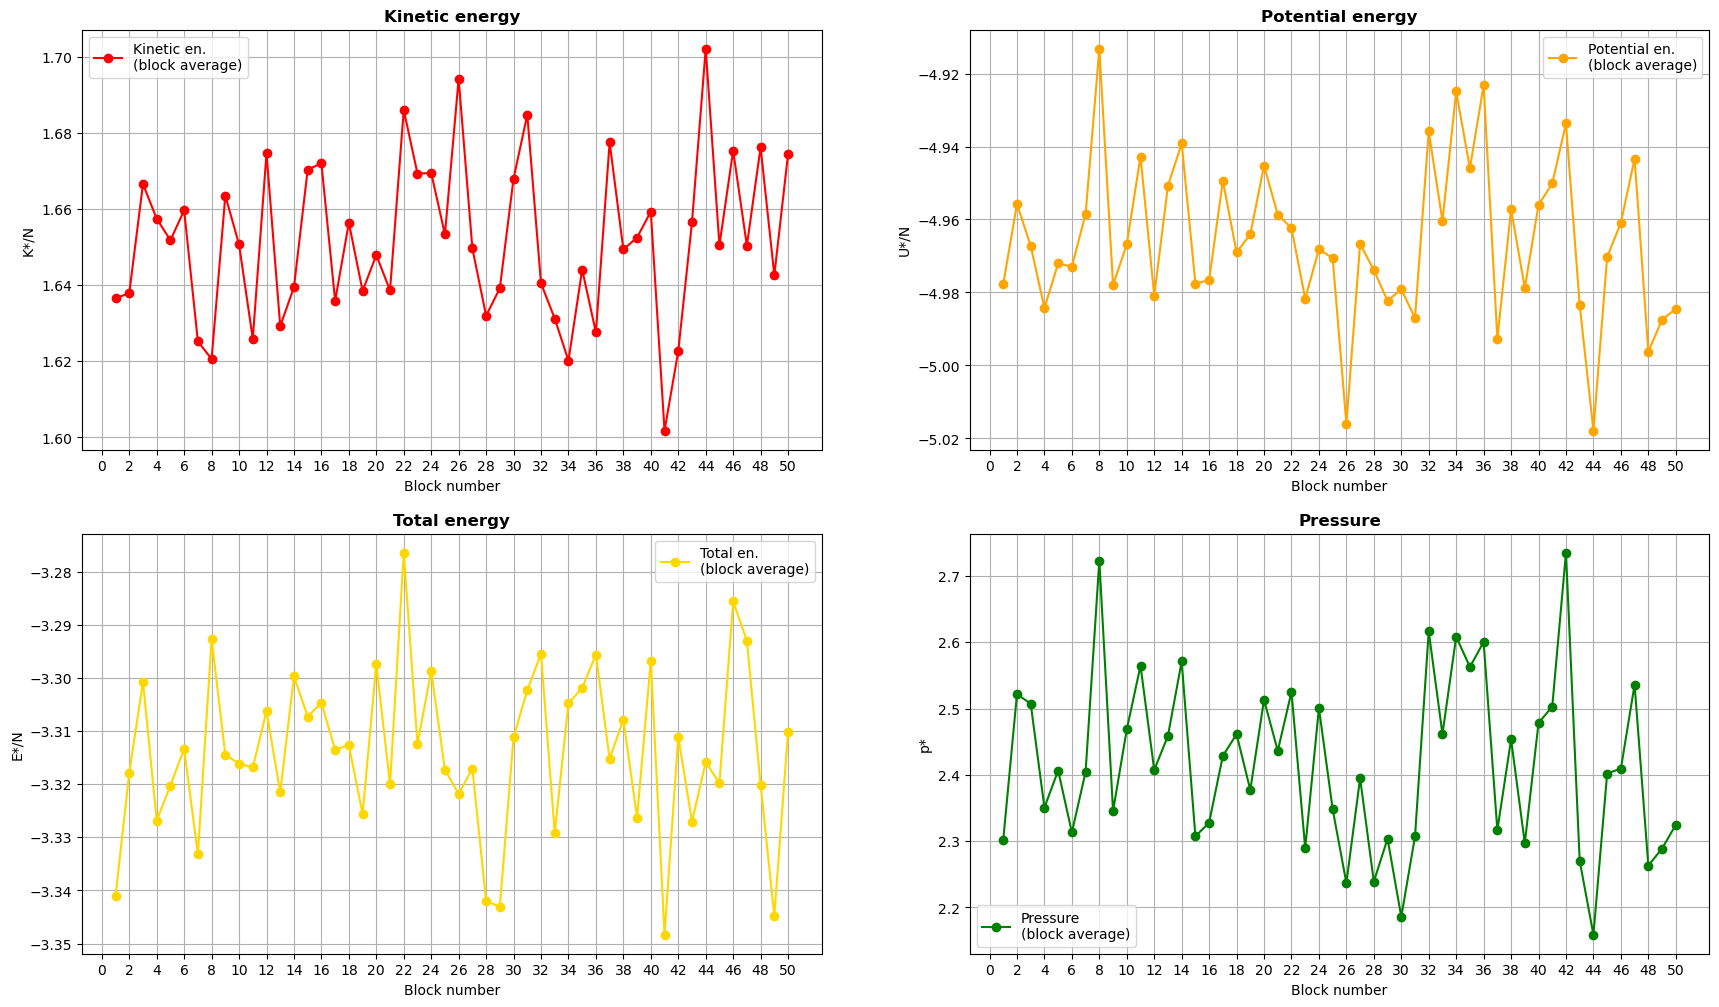

In [27]:
plt.figure(figsize=(21,12))
plt.suptitle("Liquid phase", fontsize = 25,fontweight='bold')

for i in range(0,5):
    
    plt.subplot(2,3,i+1)
    ave, ave_prog, err = np.loadtxt("../DATA/Liquid/"+th_var[i]+".dat", usecols=(1,2,3), unpack='true')

    if(i!=4):
        plt.errorbar(x, ave_prog, yerr = err, label=labels[i], color = colors[i],ecolor='blue', capsize=4,marker='s',mfc='red',mec='green', ms=5, mew=1)
    if(i==4):
        plt.plot(x, ave, marker='o', label=labels[i], color = colors[i])
        plt.axhline(y=1.1, color ="r") # desired equilibrium T*
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(0,N+1,2))         
    plt.grid(True)
    plt.legend()

i=5
plt.subplot(2,3,i+1)
plt.errorbar(x, ave_prog, yerr = err, label=labels[i],color = colors[i],ecolor='blue', capsize=4,marker='s',mfc='red',mec='green', ms=5, mew=1)
plt.title(titles[i], fontweight='bold')
plt.ylabel(ylabels[i])
plt.xlabel('Block number')
plt.xticks(np.arange(0,N+1,2))
plt.axhline(y=1.1, color ="r") # desired equilibrium T*
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(21,12))

for i in range(0,4):
    
    plt.subplot(2,2,i+1)
    ave, ave_prog, err = np.loadtxt("../DATA/Liquid/"+th_var[i]+".dat", usecols=(1,2,3), unpack='true')
    plt.plot(x, ave, marker='o', label=labels2[i], color = colors[i])
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(0,N+1,2)) 
    plt.grid(True)
    plt.legend()
plt.show()

## Solid State

```bash
SIMULATION_TYPE        0
RESTART                0
TEMP                   1.596
NPART                  108
RHO                    1.1
R_CUT                  2.2
DELTA                  0.0005
NBLOCKS                50
NSTEPS                 2000

ENDINPUT
```

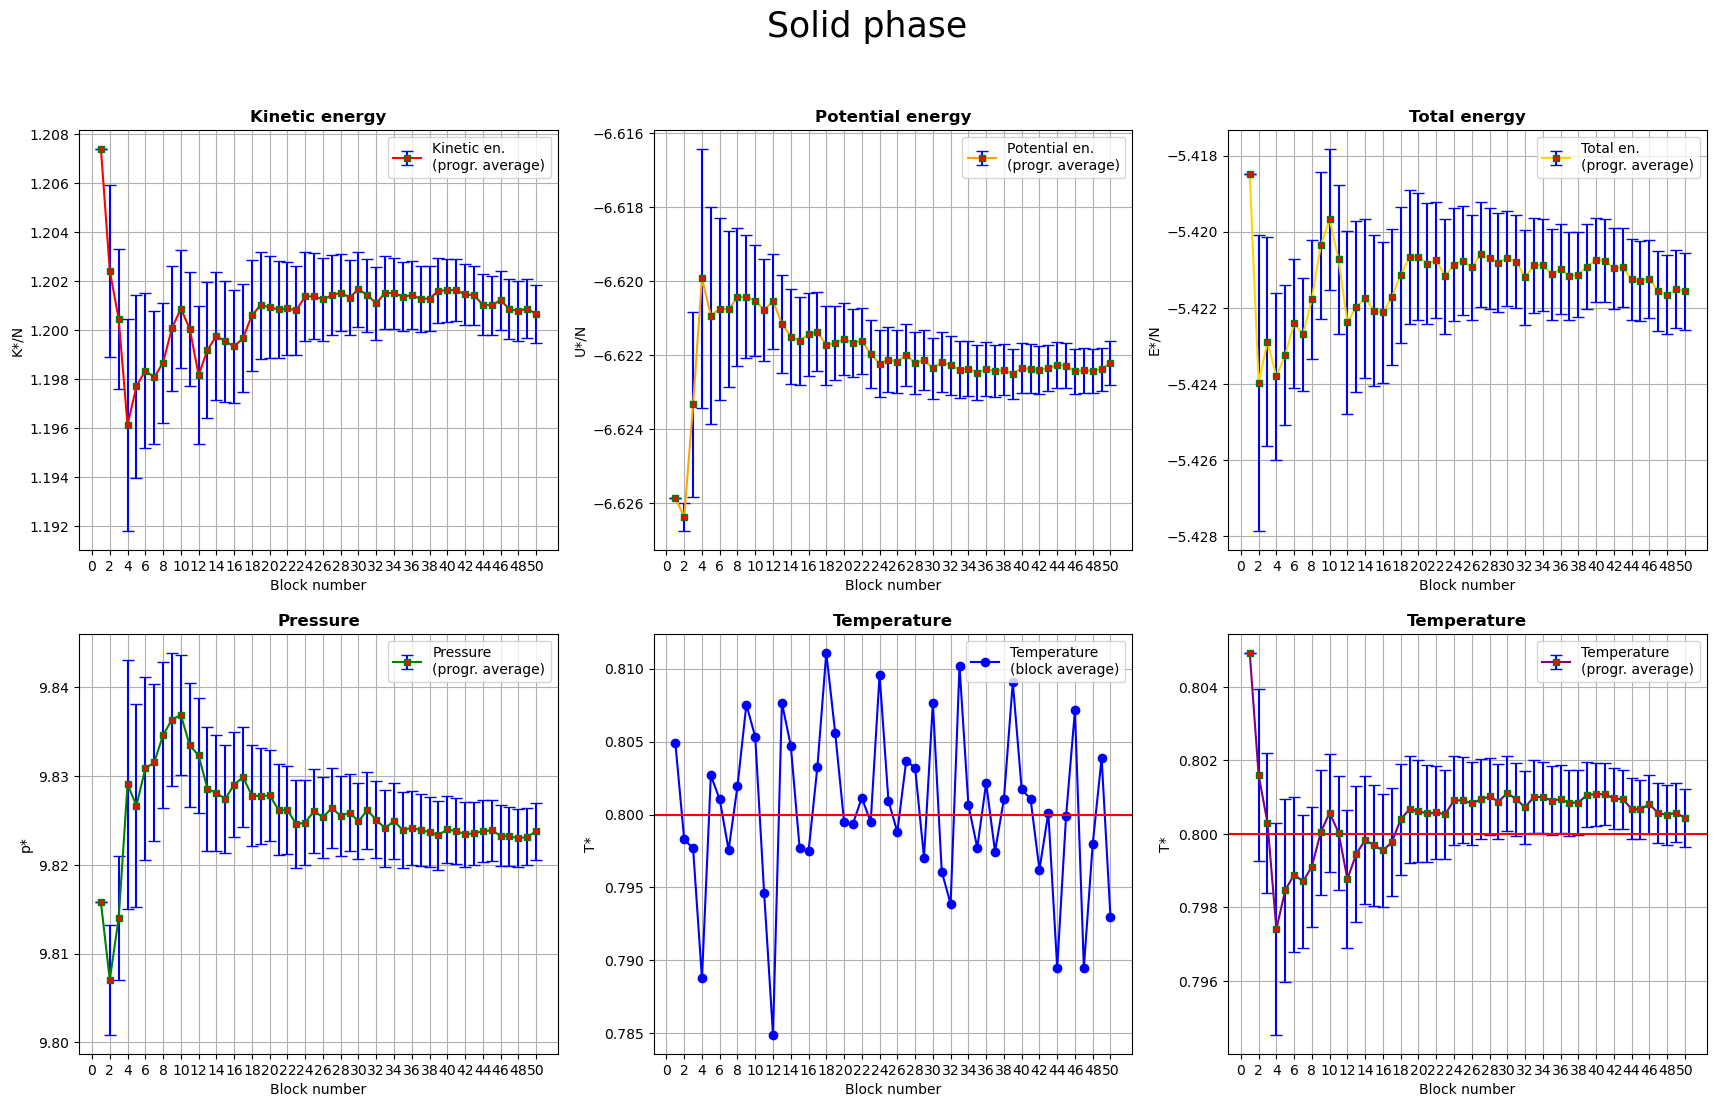

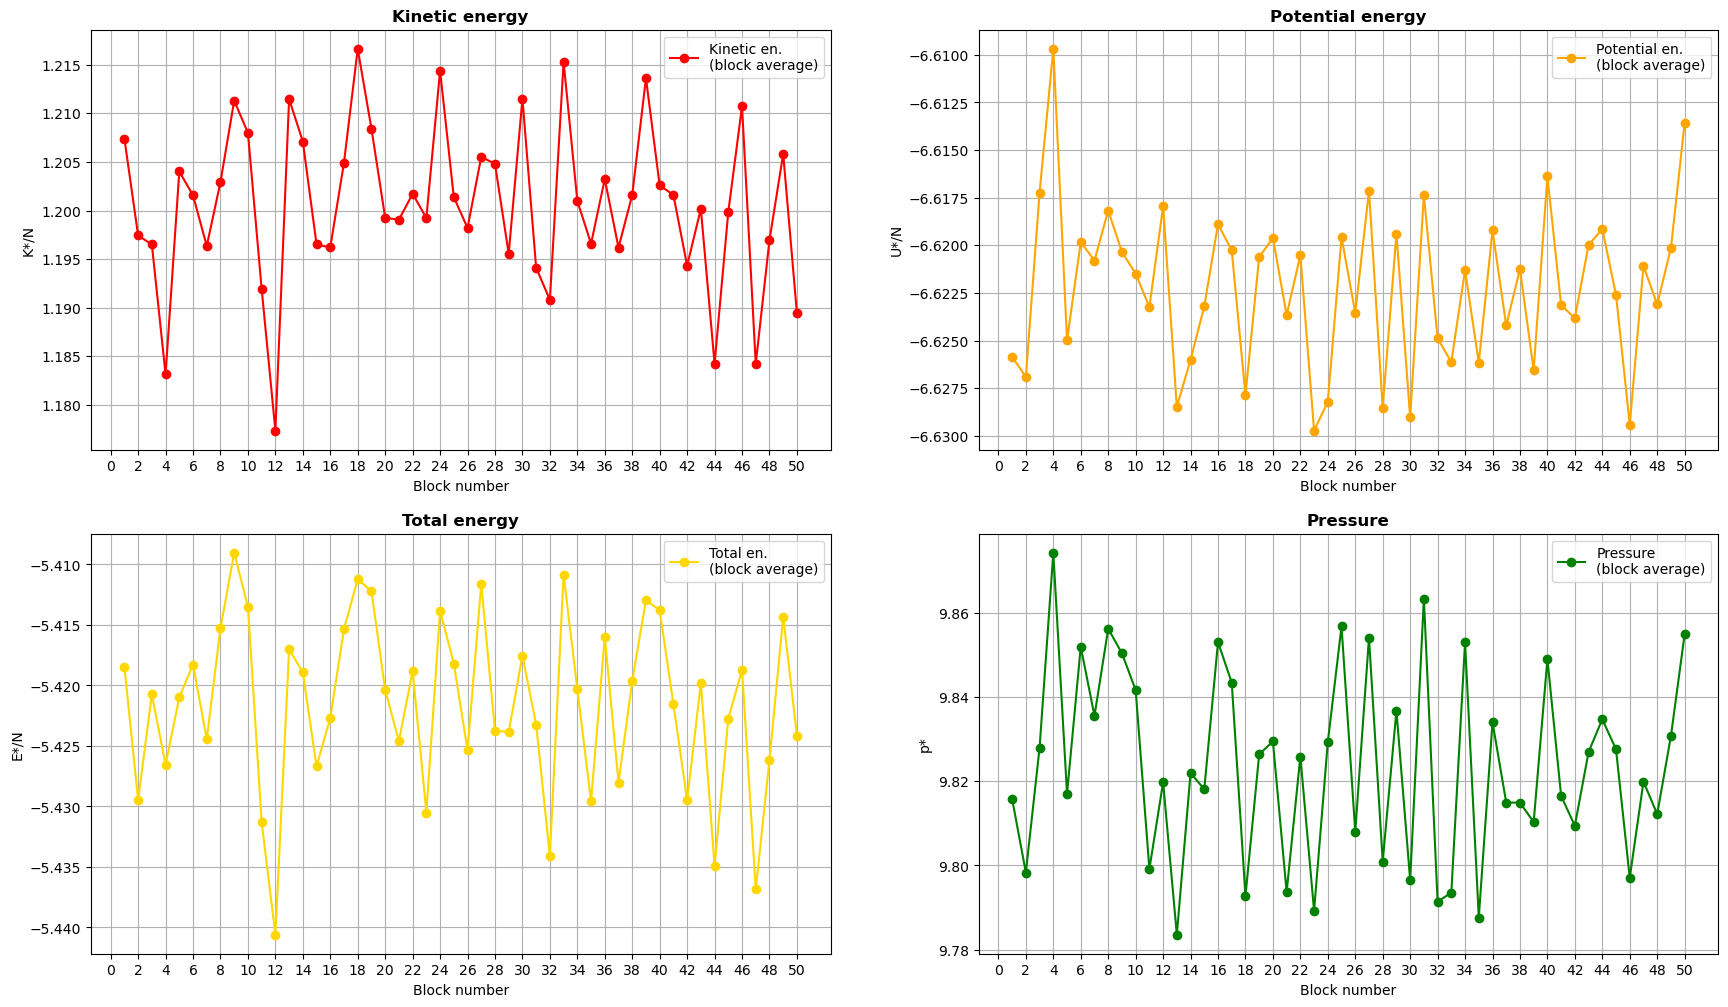

In [28]:
plt.figure(figsize=(21,12))
plt.suptitle("Solid phase", fontsize = 25)

for i in range(0,5):
    
    plt.subplot(2,3,i+1)
    ave, ave_prog, err = np.loadtxt("../DATA/Solid/"+th_var[i]+".dat", usecols=(1,2,3), unpack='true')

    if(i!=4):
        plt.errorbar(x, ave_prog, yerr = err, label=labels[i], color = colors[i],ecolor='blue', capsize=4,marker='s',mfc='red',mec='green', ms=5, mew=1)
    if(i==4):
        plt.plot(x, ave, marker='o', label=labels[i], color = colors[i])
        plt.axhline(y=0.8, color ="r") # desired equilibrium T*
    
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(0,N+1,2))
    plt.grid(True)
    plt.legend()

i=5
plt.subplot(2,3,i+1)
plt.errorbar(x, ave_prog, yerr = err, label=labels[i],color = colors[i],ecolor='blue', capsize=4,marker='s',mfc='red',mec='green', ms=5, mew=1)
plt.title(titles[i], fontweight='bold')
plt.ylabel(ylabels[i])
plt.xlabel('Block number')
plt.xticks(np.arange(0,N+1,2))
plt.axhline(y=0.8, color ="r") # desired equilibrium T*
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(21,12))

for i in range(0,4):
    
    plt.subplot(2,2,i+1)
    ave, ave_prog, err = np.loadtxt("../DATA/Solid/"+th_var[i]+".dat", usecols=(1,2,3), unpack='true')
    plt.plot(x, ave, marker='o', label=labels2[i], color = colors[i])
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(0,N+1,2)) 
    plt.grid(True)
    plt.legend()
plt.show()